## Estudo GDP vs Better Life Index

O intuito é ter um exemplo completo de manipulação e concatenação de dados.
Para isso foram usados os dados do Fundo monetário Internacional e da OCDE.

Exemplo retirado do livro Hands-On Machine Learning.
https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### Importando os dados

#### Better Life Index (OCDE)

In [2]:
oecd_bli  = pd.read_csv('BLI.csv', delimiter=',')   # Carregando o csv
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]  # Deixando somente os valores totais 
oecd_bli_pivot = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")  # Criando uma Pivot Table
oecd_bli_pivot.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1


#### PIB per capita (Fundo monetário Internacional)

In [3]:
gdp_per_capita = pd.read_csv('WEO_Data.xls',thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)  # renomeando a coluna
gdp_per_capita.set_index("Country", inplace=True)  # Inserindo o país como index 
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


### Preparando os dados

#### Concatenando as duas tabelas

In [4]:
full_country_stats = pd.merge(left=oecd_bli_pivot, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head(3)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0


#### Selecionando linhas e colunas

In [5]:
full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[[1, 7, 15]]

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,6.6
Chile,13340.905,6.7
Spain,25864.721,6.4


### Plotando os dados

Text(0.5,1,'BLI x GDP')

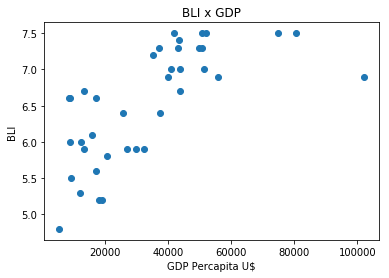

In [6]:
plt.scatter(full_country_stats['GDP per capita'], full_country_stats['Life satisfaction'])

plt.xlabel('GDP Percapita U$') # Rótulo eixo x
plt.ylabel('BLI') # Rótilo eixo y
plt.title('BLI x GDP') # Título do gráfico;

### Aplicando o modelo de regressão linear

In [12]:
# Instanciando o modelo
regr_lin = LinearRegression()

# Separando os dados a serem correlacionados
X = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life satisfaction"]]

# Aplicando o modelo
regr_lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Verificando os parâmetros

In [13]:
print("Coeficiente angular:", regr_lin.coef_[0])
print("Inclinação da reta:", regr_lin.intercept_)

Coeficiente angular: [2.46864974e-05]
Inclinação da reta: [5.68866936]


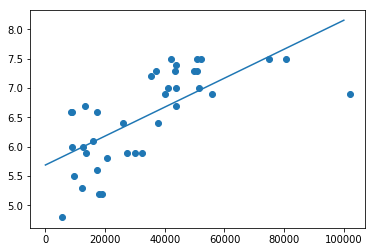

In [22]:
# Criando as variáveis independentes para plotar a linha
Xline = np.linspace(0, 100000, 1000)

# Predizendo os dados de y através do modelo treinado
yfit = regr_lin.predict(Xline[:, np.newaxis])

# Plotando os dados juntamente com a linha de regressão linear
plt.scatter(X, y)
plt.plot(Xline, yfit);